# hp refinement example using MPT-Calculator

In [1]:
from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

In [2]:
from runner import main

importing NGSolve-6.2.2202


## p - Refinement

In this example, we wish to explore the effect of changing the polynomial order of the $\boldsymbol{H}(curl)$ discretisation. We expect that increasing the order $p$ from $p=0\rightarrow p=1\rightarrow p=2\rightarrow p=3$ will result in a more accurate simulation at the cost of an increased computational time.

For control over the order we want to specify $p$ as an input argument
```python
main(order=p)
```

which can be done iteratively

sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
 solved theta0 problems    
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2202del
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete
sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
 solved theta0 problems    
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2202del
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pooler system 39/40    
 reduc

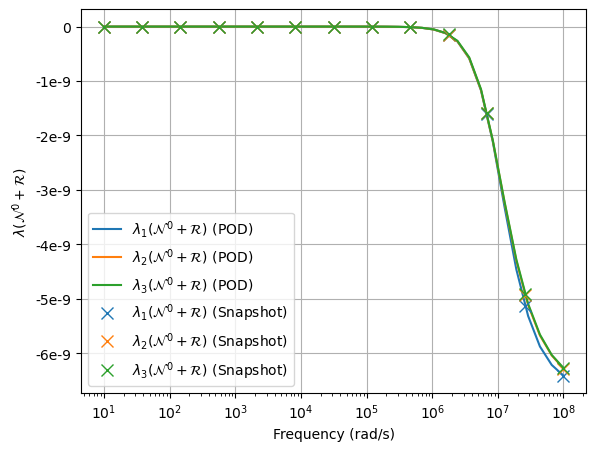

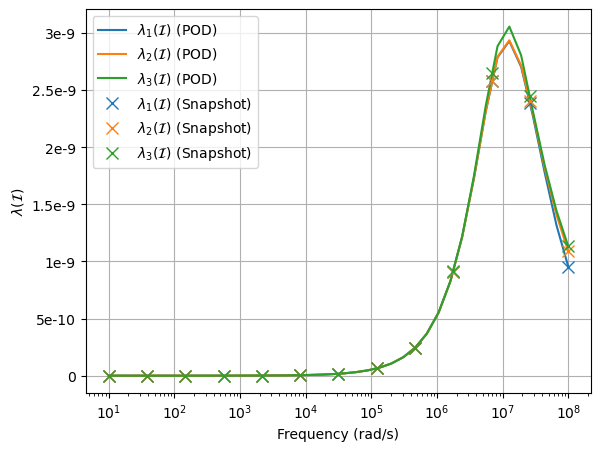

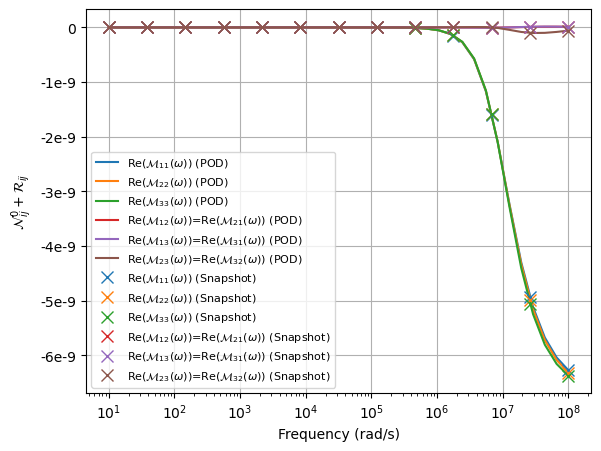

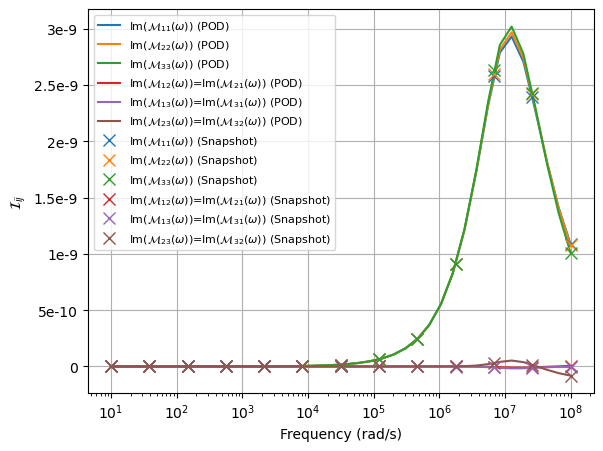

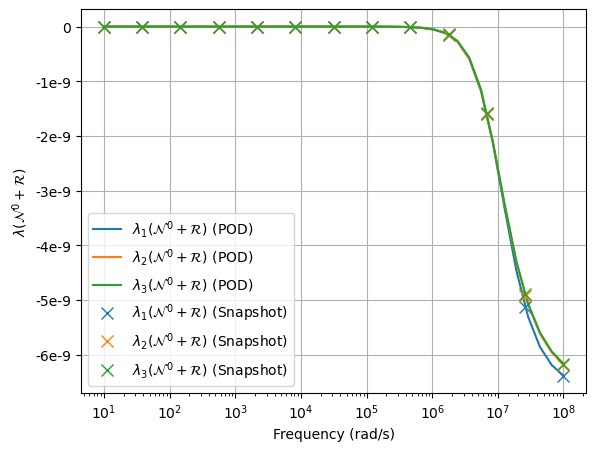

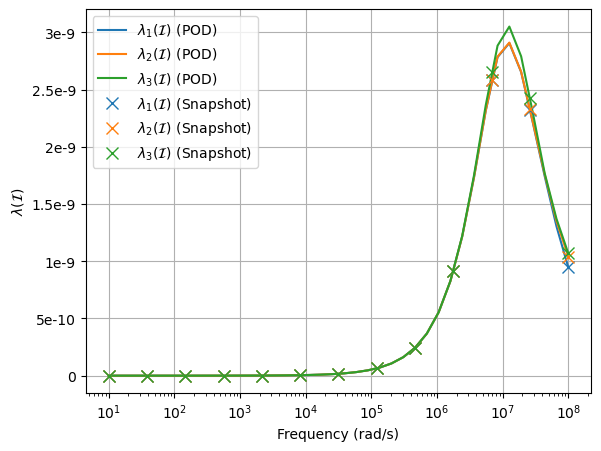

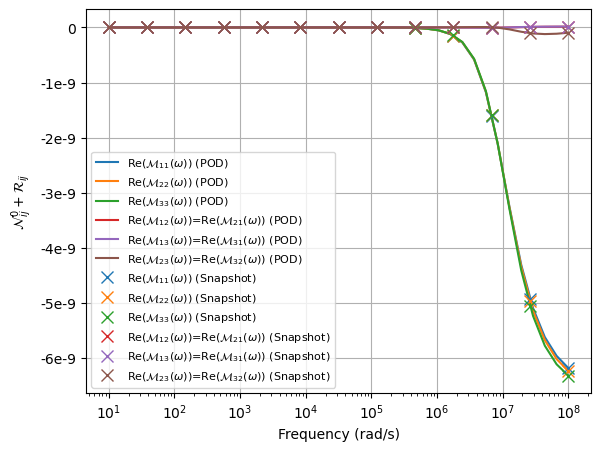

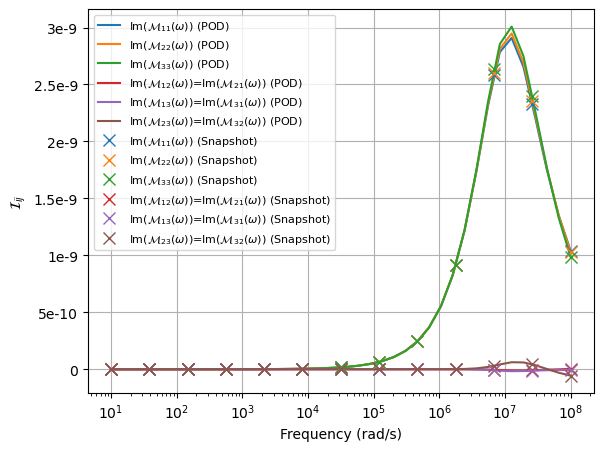

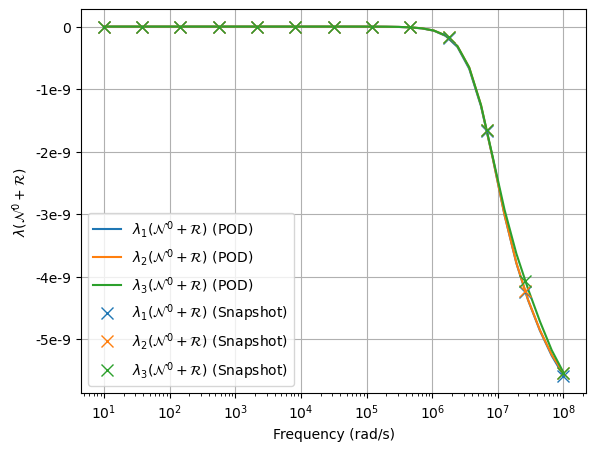

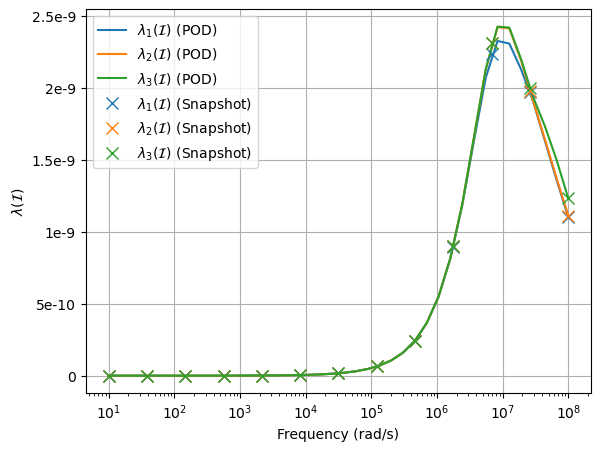

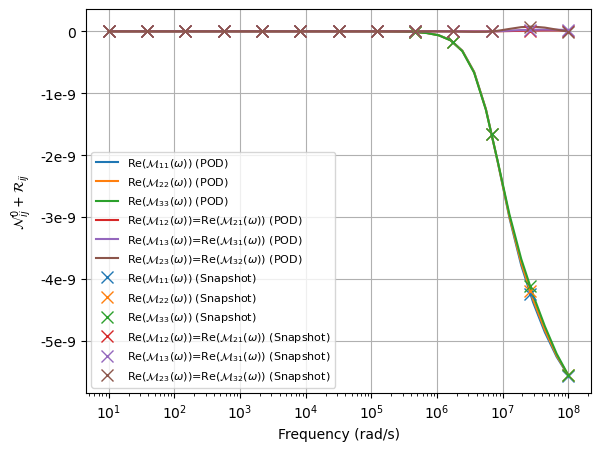

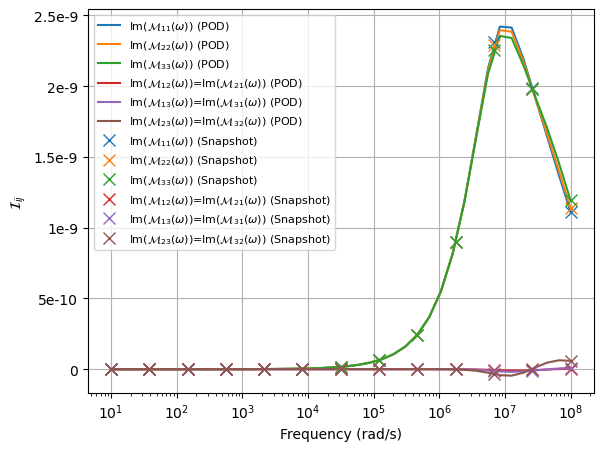

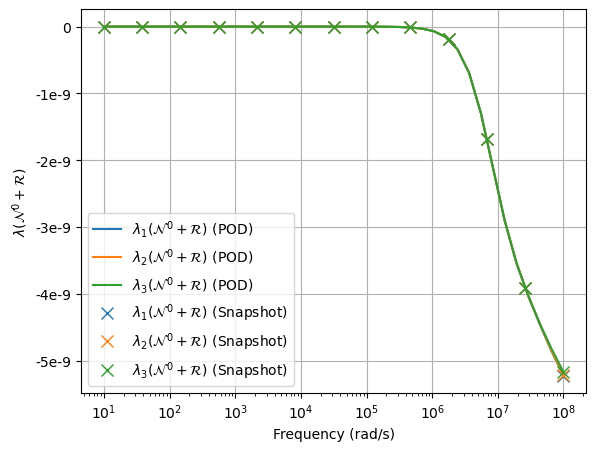

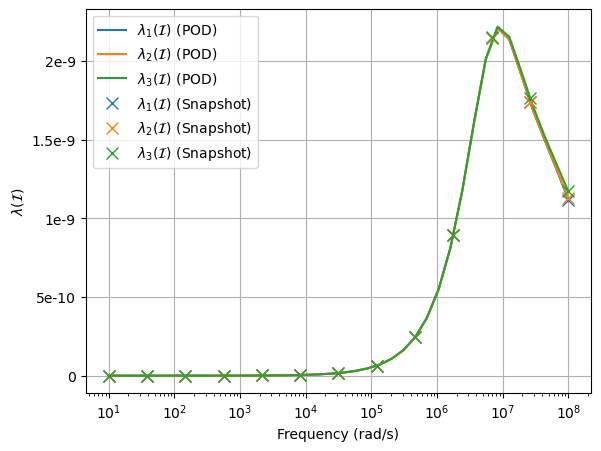

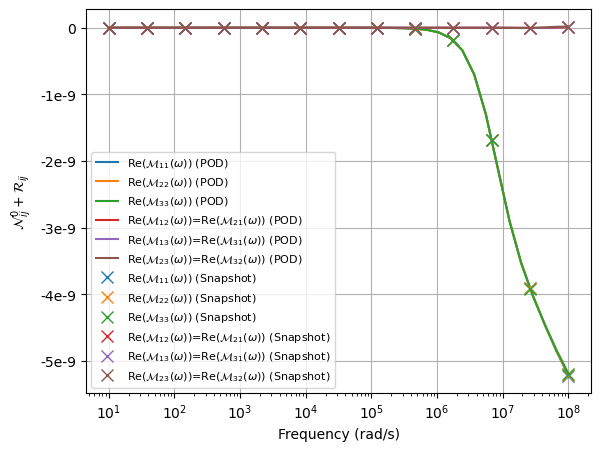

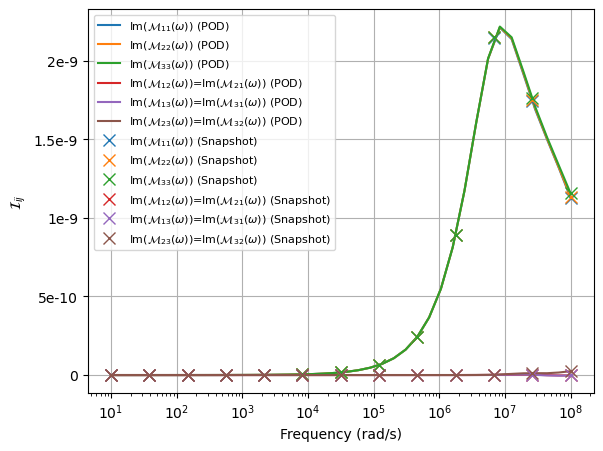

In [3]:
comparison_eig = np.zeros((40,4), dtype=complex)
for p in [0,1,2,3]:
    TensorArray, EigenValues, N0, elements, Array, ndofs, EddyCurrentTest = main(use_POD=True, order=p)
    comparison_eig[:,p] = EigenValues[:,0]

Plotting the first eigenvalue for the different $p$, shows that the solutions are in agreement upto $\sim 10^6$ rad/s, after which the solutions begin to diverge.

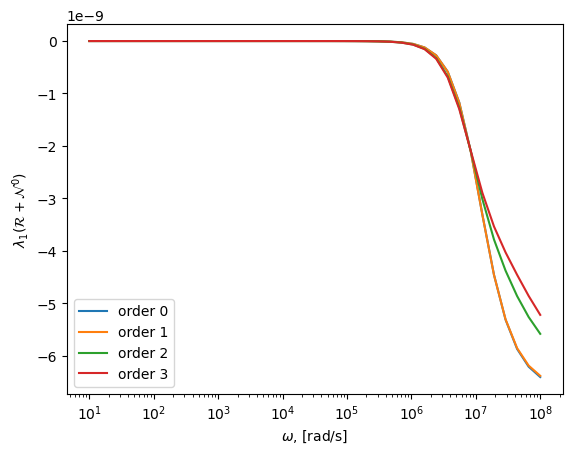

In [4]:
for p in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig[:,p].real, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

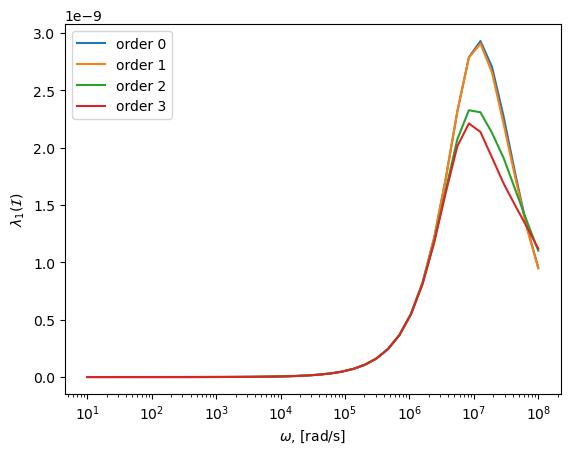

In [5]:
for p in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig[:,p].imag, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

Since orders 2 and 3 disagree

## h - Refinement

Do we want to demonstrate h refinement, since that would involve editting the .geo file?

sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
 solved theta0 problems    
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2202del
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete
sphere.geo
 mesh contains 9814 elements
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
 solved theta0 problems    
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2202del
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
importing NGSolve-6.2.2202
manually closed pooler system 39/40    
 reduc

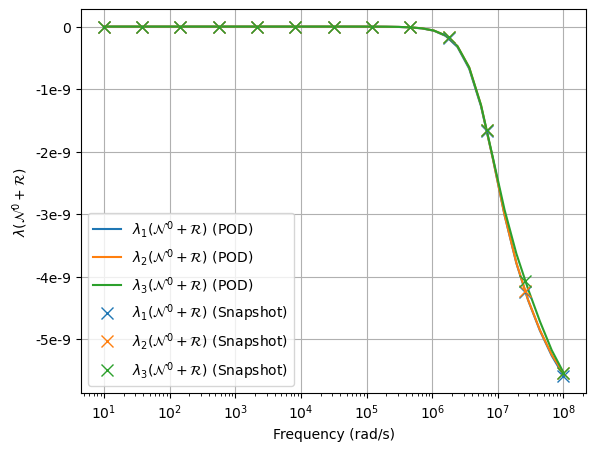

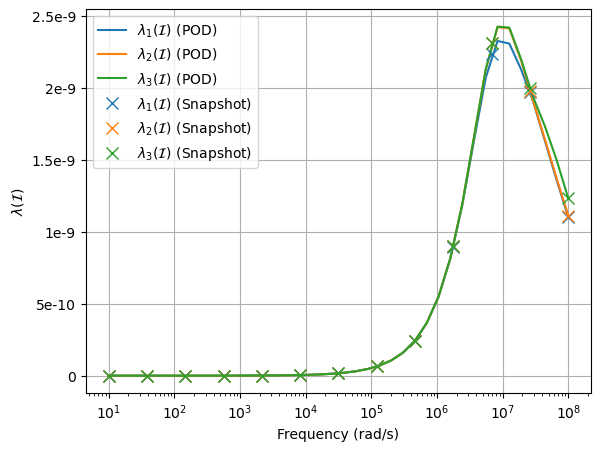

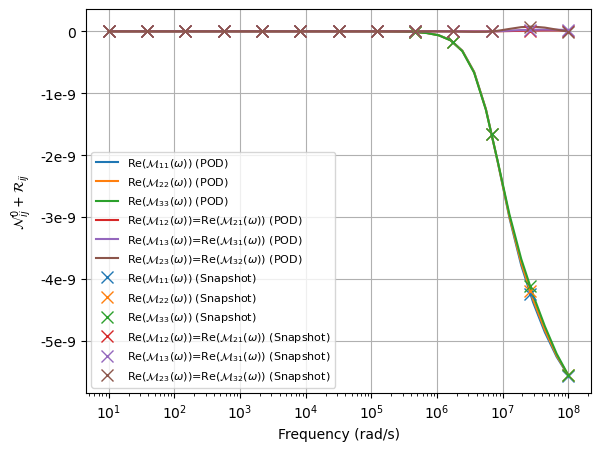

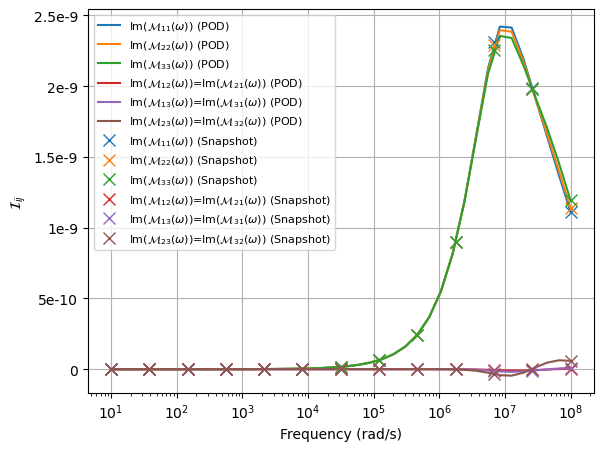

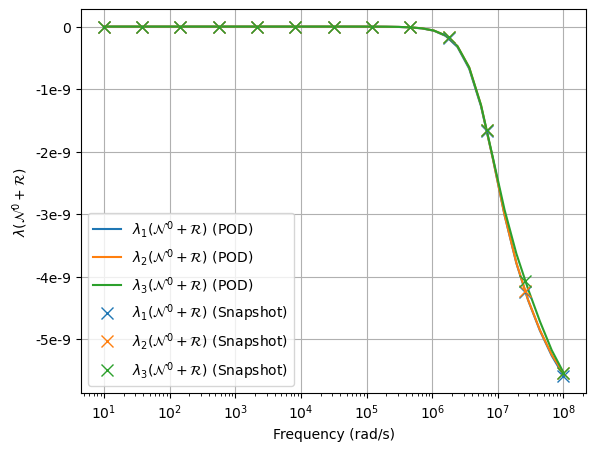

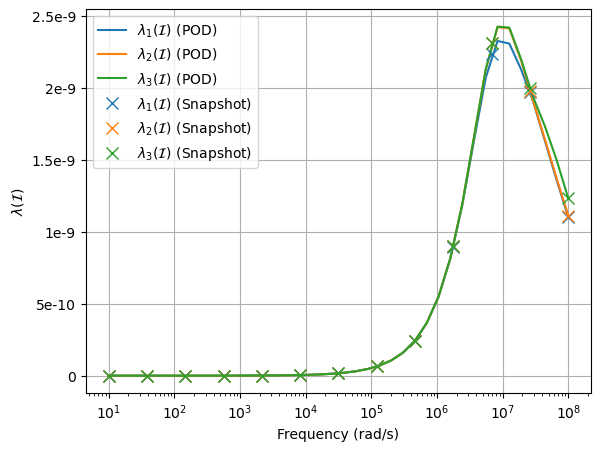

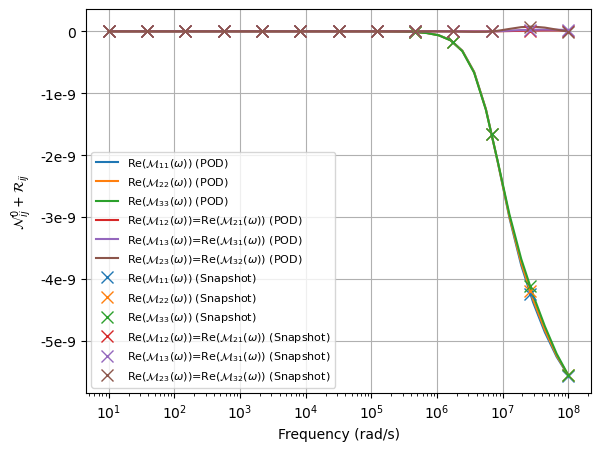

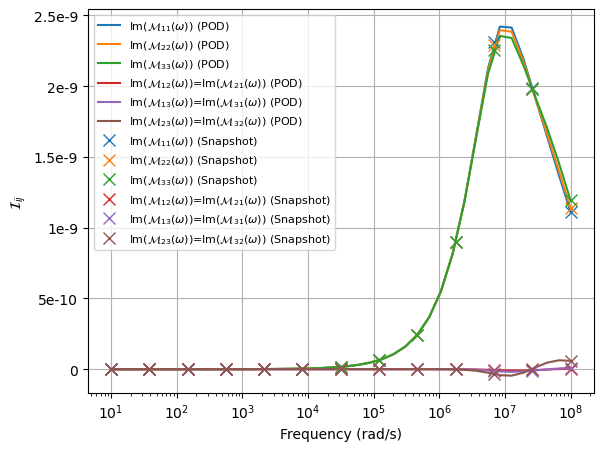

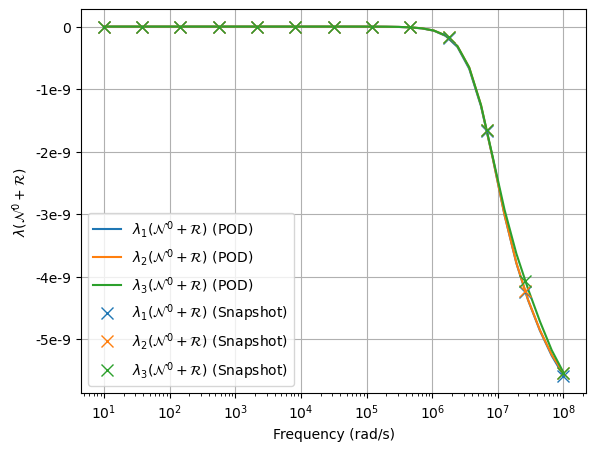

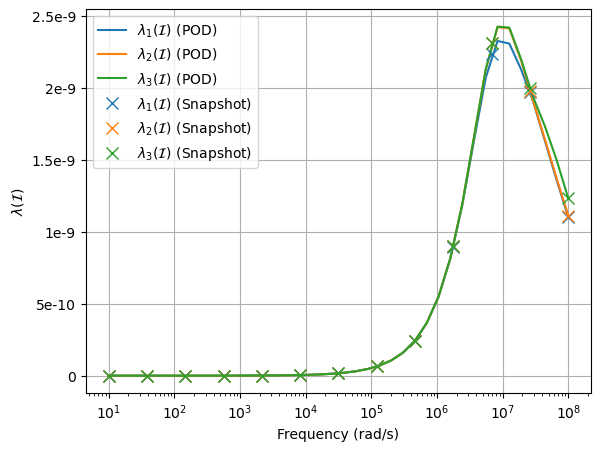

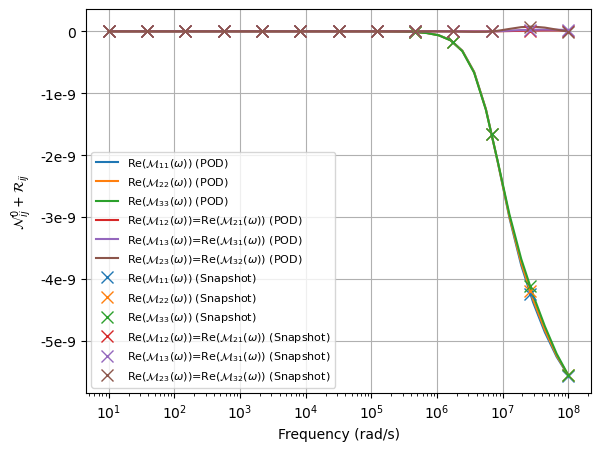

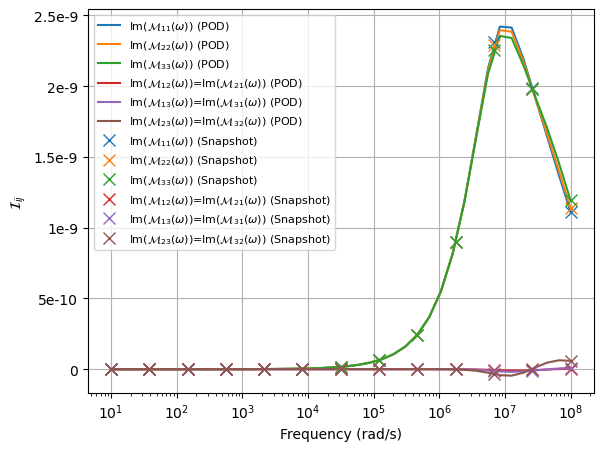

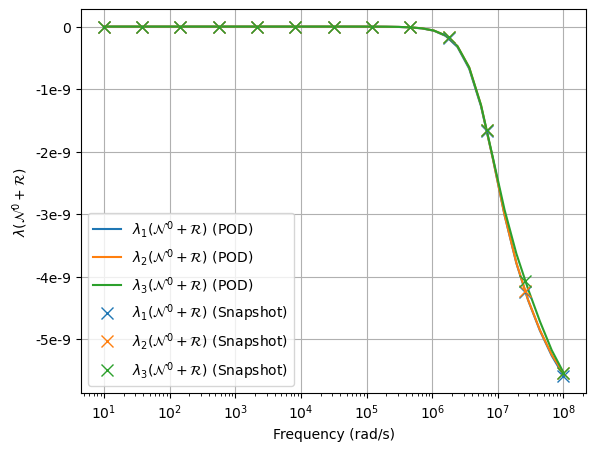

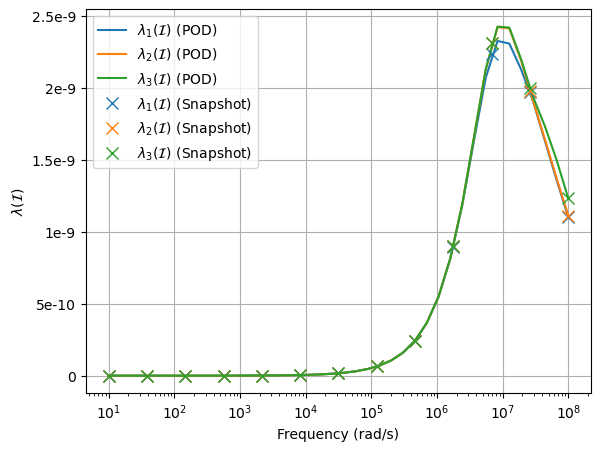

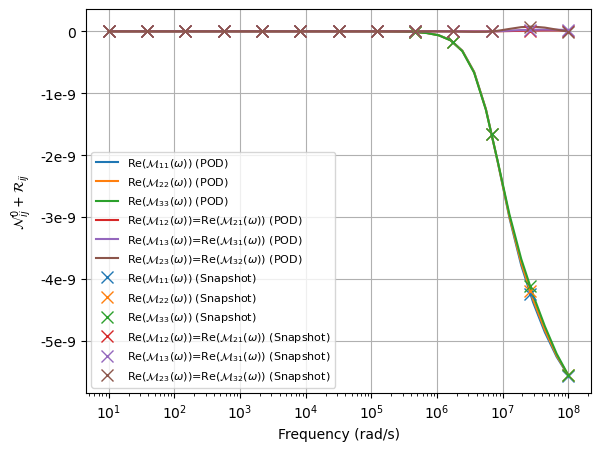

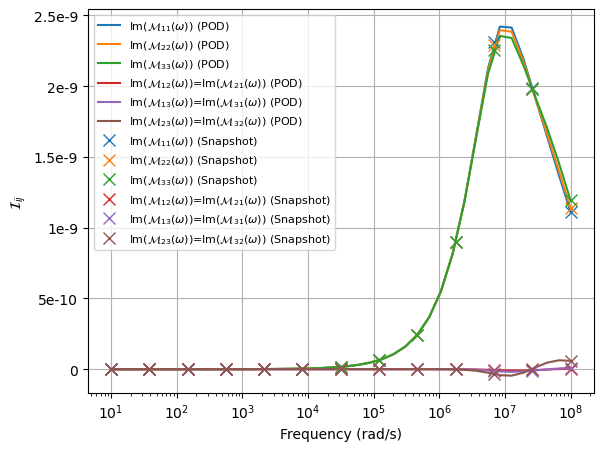

In [8]:
comparison_eig = np.zeros((40,4), dtype=complex)
for h in [1,2,3,4]:
    TensorArray, EigenValues, N0, elements, Array, ndofs, EddyCurrentTest = main(use_POD=True, h=h)
    comparison_eig[:,h-1] = EigenValues[:,0]

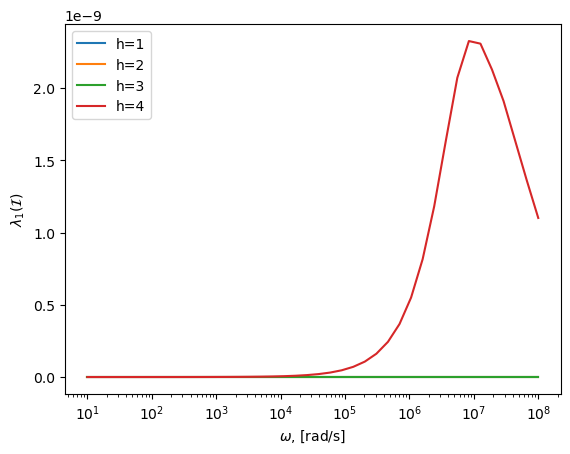

In [7]:
for h in [0,1,2,3]:
    plt.semilogx(Array, comparison_eig[:,h].imag, label=f'h={h+1}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');